In [14]:
from sklearn.cluster import DBSCAN
!pip install scikit-learn
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

zsh:1: command not found: pip


In [18]:
star_data = pd.read_csv("star_data/filtered_stars_outputs.csv")

In [19]:
star_data

,Name,v_r(km/s),v_r_std(km/s),v_phi(km/s),v_phi_std(km/s),v_x(km/s),v_x_std(km/s),v_y(km/s),v_y_std(km/s),v_z(km/s),...,energy_mean(km^2 s^(-2)),energy_std(km^2 s^(-2)),rperi_mean(kpc),rperi_std(kpc),rapo_mean(kpc),rapo_std(kpc),zmax_mean(kpc),zmax_std(kpc),ecc_mean,ecc_std
0,2.471978e+18,13.706519,0.562953,234.131754,0.364470,-0.715995,0.578602,234.531530,0.333204,-60.086637,...,-157652.125844,90.316822,7.448431,0.016099,8.378388,0.010910,1.262678,0.009634,0.058759,0.000553
1,4.892329e+18,-20.104327,0.234080,262.615497,0.009548,20.115768,0.234080,262.614621,0.009551,-16.797897,...,-149409.012270,4.286935,7.953443,0.002260,10.580419,0.003436,0.283846,0.000427,0.141739,0.000296
2,6.442047e+18,-18.570553,0.050429,255.111372,0.186813,8.183038,0.055473,255.655463,0.184562,-10.423314,...,-150678.171449,46.707469,8.055595,0.001493,10.060609,0.014240,0.167441,0.000625,0.110675,0.000609
3,3.621579e+18,-48.055889,0.304987,198.487243,0.148908,37.043867,0.272834,200.834081,0.136516,-89.137859,...,-154475.393357,40.775857,6.974156,0.003345,9.747887,0.012387,2.753459,0.018801,0.165872,0.000719
4,3.621580e+18,-27.476201,0.808640,280.834914,0.610587,21.624174,0.800949,281.346011,0.626556,-31.514392,...,-141308.277949,189.978910,8.334237,0.005857,13.249550,0.081645,0.783505,0.014059,0.227720,0.003181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1.833578e+18,-8.724626,0.324958,59.359565,0.366376,9.563494,0.328452,59.230201,0.363178,-1.839283,...,-181948.854616,23.523150,1.155106,0.008011,8.106836,0.012348,0.599943,0.002414,0.750571,0.001433
303,1.833585e+18,-16.889833,0.652362,154.172923,3.718840,46.712137,1.449275,147.873979,4.239600,12.611123,...,-165502.836226,76.315891,4.850644,0.085529,8.285616,0.087367,5.346832,0.223203,0.261486,0.013088
304,1.833590e+18,-17.024214,0.266827,229.738219,0.380936,37.838880,0.427789,227.238952,0.429443,23.363688,...,-156535.621294,55.884870,7.586105,0.003356,8.465138,0.018065,3.017625,0.039132,0.054763,0.001017
305,1.833590e+18,-53.473861,1.046778,117.573743,2.181447,70.109158,1.078693,108.472205,2.493334,45.044835,...,-171887.783048,129.787180,3.334145,0.058452,7.992369,0.018424,4.758930,0.096916,0.411298,0.008038


In [20]:
feature_set1 = ["j_phi(kpc s^(-1))", "j_r(kpc km s^-1)", "j_z(kpc km s^(-1))", "energy_mean(km^2 s^(-2))"]
feature_set2 = ["j_phi_std(kpc km s^(-1))", "j_r_std(kpc km s^-1)", "j_z_std(kpc km s^(-1))", "energy_std(km^2 s^(-2))"]
feature_set3 = ["j_phi_std(kpc km s^(-1))", "j_r_std(kpc km s^-1)", "j_z_std(kpc km s^(-1))", "energy_std(km^2 s^(-2))", "v_z_std(km/s)", "v_r_std(km/s)", "v_phi_std(km/s)"]


In [21]:
# kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)

In [22]:
# kmeans.cluster_centers_

In [23]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(
#     n_samples=280, centers=centers, cluster_std=0.4, random_state=0
# )

# X = StandardScaler().fit_transform(X[feature_set])

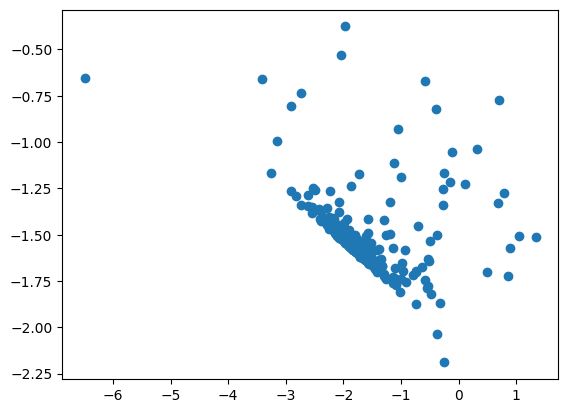

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X["j_phi(kpc s^(-1))"]/(1000), X["energy_mean(km^2 s^(-2))"]/100000)
plt.show()

In [25]:
star_data[feature_set1]

,j_phi(kpc s^(-1)),j_r(kpc km s^-1),j_z(kpc km s^(-1)),energy_mean(km^2 s^(-2))
0,-1786.170072,4.272963,35.062899,-157652.125844
1,-2115.746735,30.325684,1.897463,-149409.012270
2,-2085.269970,18.083311,0.768703,-150678.171449
3,-1749.734442,36.171998,107.868715,-154475.393357
4,-2373.910709,90.009174,7.999181,-141308.277949
...,...,...,...,...
302,-479.051401,443.594041,5.352534,-181948.854616
303,-978.698301,58.599443,401.037601,-165502.836226
304,-1659.396808,3.603927,156.106343,-156535.621294
305,-793.182113,131.601622,306.053902,-171887.783048


In [31]:
star_data = star_data.dropna()

In [29]:
clustering = DBSCAN(eps=3, min_samples=3).fit(star_data[feature_set1])
clustering = DBSCAN(eps=3, min_samples=3).fit(star_data[feature_set2])

clustering = DBSCAN(eps=80, min_samples=10).fit(star_data[feature_set1])

In [33]:
# eps_values = [3, 5, 10, 30, 50, 80, 100, 150, 200]
eps_values = [1, 2, 3, 5, 7, 10, 13, 17, 20, 30, 50, 80, 130]

clustering = []
for i in eps_values:
    clustering.append(DBSCAN(eps=i, min_samples=5).fit(star_data[feature_set3]))

In [35]:
# clustering.labels_

In [36]:
eps_val = 0
for cluster in clustering:
    labels = cluster.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)
    print("epsilon value: %d" % eps_values[eps_val])
    eps_val += 1

Estimated number of clusters: 1
Estimated number of noise points: 300
epsilon value: 1
Estimated number of clusters: 4
Estimated number of noise points: 256
epsilon value: 2
Estimated number of clusters: 5
Estimated number of noise points: 188
epsilon value: 3
Estimated number of clusters: 5
Estimated number of noise points: 131
epsilon value: 5
Estimated number of clusters: 2
Estimated number of noise points: 102
epsilon value: 7
Estimated number of clusters: 5
Estimated number of noise points: 72
epsilon value: 10
Estimated number of clusters: 4
Estimated number of noise points: 61
epsilon value: 13
Estimated number of clusters: 2
Estimated number of noise points: 52
epsilon value: 17
Estimated number of clusters: 2
Estimated number of noise points: 50
epsilon value: 20
Estimated number of clusters: 3
Estimated number of noise points: 40
epsilon value: 30
Estimated number of clusters: 2
Estimated number of noise points: 33
epsilon value: 50
Estimated number of clusters: 2
Estimated n

In [ ]:
clustering[8].labels_
np.histogram(clustering[7].labels_, bins=8)

In [ ]:
star_data["clusters"] = clustering[7].labels_

In [ ]:
star_data["source_id"] = star_data["Name"]

In [37]:
star_data

,Name,v_r(km/s),v_r_std(km/s),v_phi(km/s),v_phi_std(km/s),v_x(km/s),v_x_std(km/s),v_y(km/s),v_y_std(km/s),v_z(km/s),...,energy_mean(km^2 s^(-2)),energy_std(km^2 s^(-2)),rperi_mean(kpc),rperi_std(kpc),rapo_mean(kpc),rapo_std(kpc),zmax_mean(kpc),zmax_std(kpc),ecc_mean,ecc_std
0,2.471978e+18,13.706519,0.562953,234.131754,0.364470,-0.715995,0.578602,234.531530,0.333204,-60.086637,...,-157652.125844,90.316822,7.448431,0.016099,8.378388,0.010910,1.262678,0.009634,0.058759,0.000553
1,4.892329e+18,-20.104327,0.234080,262.615497,0.009548,20.115768,0.234080,262.614621,0.009551,-16.797897,...,-149409.012270,4.286935,7.953443,0.002260,10.580419,0.003436,0.283846,0.000427,0.141739,0.000296
2,6.442047e+18,-18.570553,0.050429,255.111372,0.186813,8.183038,0.055473,255.655463,0.184562,-10.423314,...,-150678.171449,46.707469,8.055595,0.001493,10.060609,0.014240,0.167441,0.000625,0.110675,0.000609
3,3.621579e+18,-48.055889,0.304987,198.487243,0.148908,37.043867,0.272834,200.834081,0.136516,-89.137859,...,-154475.393357,40.775857,6.974156,0.003345,9.747887,0.012387,2.753459,0.018801,0.165872,0.000719
4,3.621580e+18,-27.476201,0.808640,280.834914,0.610587,21.624174,0.800949,281.346011,0.626556,-31.514392,...,-141308.277949,189.978910,8.334237,0.005857,13.249550,0.081645,0.783505,0.014059,0.227720,0.003181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1.833578e+18,-8.724626,0.324958,59.359565,0.366376,9.563494,0.328452,59.230201,0.363178,-1.839283,...,-181948.854616,23.523150,1.155106,0.008011,8.106836,0.012348,0.599943,0.002414,0.750571,0.001433
303,1.833585e+18,-16.889833,0.652362,154.172923,3.718840,46.712137,1.449275,147.873979,4.239600,12.611123,...,-165502.836226,76.315891,4.850644,0.085529,8.285616,0.087367,5.346832,0.223203,0.261486,0.013088
304,1.833590e+18,-17.024214,0.266827,229.738219,0.380936,37.838880,0.427789,227.238952,0.429443,23.363688,...,-156535.621294,55.884870,7.586105,0.003356,8.465138,0.018065,3.017625,0.039132,0.054763,0.001017
305,1.833590e+18,-53.473861,1.046778,117.573743,2.181447,70.109158,1.078693,108.472205,2.493334,45.044835,...,-171887.783048,129.787180,3.334145,0.058452,7.992369,0.018424,4.758930,0.096916,0.411298,0.008038


In [39]:
# cluster_df = pd.DataFrame(star_data["Name"],(star_data["clusters"]))
# cluster_df["source_id"] = cluster_df["Name"]

In [ ]:
del cluster_df["Name"]

In [ ]:
cluster_df = star_data[['Name','clusters']]
cluster_df["source_id"] = cluster_df["Name"]

In [ ]:
cluster_df

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns


In [ ]:
tsne = TSNE(n_components=3, verbose=1, random_state=42)
z = tsne.fit_transform(X[feature_set3]) 

In [ ]:
z.shape

In [ ]:
%pylab inline
%matplotlib inline 
%matplotlib notebook

In [ ]:
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode()

x = z[:,0]
y = z[:,1]
z_ = z[:,2]

In [ ]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(
    x=x,  # <-- Put your data instead
    y=y,  # <-- Put your data instead
    z=z_,  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
        'color' : clustering[5].labels_
        
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

In [ ]:
np.histogram(clustering[6].labels_, bins=8)

In [ ]:
filtered_stars_df = pd.read_csv("star_data/filtered_stars.csv")

In [ ]:
filtered_stars_df

In [ ]:
X

In [ ]:

merged_df = pd.merge(filtered_stars_df, X, on="source_id") 

In [ ]:
plt.scatter(merged_df["V"], merged_df["T"], marker='.', c=merged_df["clusters"])
plt.xlabel('Velocity in the direction of rotation V', fontsize=20)
plt.ylabel( r'T = $\sqrt{U^2 + W^2}$', fontsize=20)

plt.xlim(-600,  400)
plt.ylim(0, 450)
plt.show()

plt.show()

In [ ]:
px.scatter(merged_df, x=merged_df["V"], y=merged_df["T"], color=merged_df["clusters"])

In [ ]:
# merged_df = stars_table.to_pandas()

merged_df["V-232"] = merged_df.apply( \
        lambda row: abs(row['V'] - 232),
        axis=1 \
    )

merged_df = merged_df[merged_df["V-232"]**2 + merged_df["T"]**2 > 210**2]


In [ ]:
px.scatter(merged_df, x=merged_df["V-232"], y=merged_df["T"], color=merged_df["clusters"])

In [ ]:
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.datasets import make_blobs